In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read csv files
df_emp = pd.read_csv('../../Data/Downloaded_Old/post_emp.csv')
df_GDP = pd.read_csv('../../Data/Downloaded_Old/post_GDP.csv')
df_cns = pd.read_csv('../../Data/Downloaded_Old/post_real_cns.csv')

In [3]:
# parameters
α_KA  = 0.15
α_LA  = 0.55
α_KM  = 0.6
α_LM  = 0.4
η     = 0.15
γ_pre = 60
#γ_post = 76.4
γ_post = 68.8 
δ     = 0.05
β     = 0.96

In [4]:
# create the ratio of marginal utility
df_cns['cA-γ/cM'] = (df_cns['real_food_cns'] - γ_post) / df_cns['real_non_food_cns']
df_cns['mu_M/mu_A'] = (1-η) / η * df_cns['cA-γ/cM']

In [5]:
df_GDP_emp = pd.merge(df_GDP, df_emp, on = 'year_wst')

In [6]:
df_GDP_emp_picked = df_GDP_emp[['year_wst', 'prm_GDP', 'non_prm_GDP', 'prm_emp', 'non_prm_emp']]

In [7]:
df_GDP_emp_picked['F_LA'] = α_LA * df_GDP_emp_picked['prm_GDP'] / df_GDP_emp_picked['prm_emp'] 

/Users/satoshi/miniconda3/envs/jpandas/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [8]:
df_GDP_emp_picked['F_LM'] = α_LM * df_GDP_emp_picked['non_prm_GDP'] / df_GDP_emp_picked['non_prm_emp'] 

In [9]:
# get the ratio of labor productivity
df_GDP_emp_picked['F_LM/F_LA'] = df_GDP_emp_picked['F_LM'] / df_GDP_emp_picked['F_LA']

In [10]:
df_merged = pd.merge(df_GDP_emp_picked[['year_wst', 'F_LM/F_LA']], 
                    df_cns[['year_wst', 'mu_M/mu_A']], on = 'year_wst')

In [11]:
df_merged['norm_labor_wedge'] = df_merged['mu_M/mu_A'] * df_merged['F_LM/F_LA']

In [12]:
df_merged['norm_labor_wedge-1'] = df_merged['norm_labor_wedge'] - 1

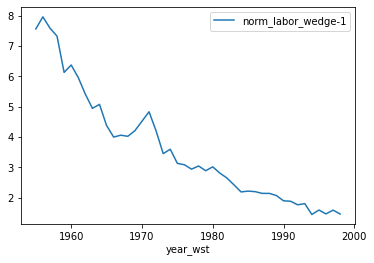

In [13]:
fig, ax = plt.subplots()
df_merged.plot(x = 'year_wst', y = 'norm_labor_wedge-1', ax = ax)
plt.legend()

In [14]:
#df_merged.to_csv('../../Data/Results/post_lab_w.csv', index = False)

In [15]:
df_merged.loc[0:4]['norm_labor_wedge-1'].mean()

7.3116572948222025

In [16]:
df_merged

,year_wst,F_LM/F_LA,mu_M/mu_A,norm_labor_wedge,norm_labor_wedge-1
0,1955,1.695264,5.048960,8.559319,7.559319
1,1956,1.784167,5.021302,8.958842,7.958842
2,1957,1.762747,4.871797,8.587747,7.587747
3,1958,1.716479,4.848288,8.321983,7.321983
4,1959,1.606595,4.438202,7.130395,6.130395
5,1960,1.714584,4.300208,7.373070,6.373070
6,1961,1.764180,3.945175,6.959997,5.959997
7,1962,1.801952,3.559061,6.413256,5.413256
8,1963,1.868350,3.182724,5.946443,4.946443
9,1964,1.907048,3.186548,6.076899,5.076899


In [17]:
df_GDP_emp_picked

,year_wst,prm_GDP,non_prm_GDP,prm_emp,non_prm_emp,F_LA,F_LM,F_LM/F_LA
0,1955,8863.9,32593.2,1536,2423,3.173923,5.380636,1.695264
1,1956,8635.4,35858.5,1500,2539,3.166313,5.649232,1.784167
2,1957,8938.6,39667.8,1467,2686,3.351213,5.907342,1.762747
3,1958,9254.5,42753.4,1408,2756,3.615039,6.205138,1.716479
4,1959,9975.0,46441.2,1348,2841,4.069918,6.538712,1.606595
5,1960,10263.0,53338.6,1340,2954,4.212425,7.222559,1.714584
6,1961,10607.1,60109.4,1303,3044,4.477287,7.898739,1.764180
7,1962,10609.0,65081.6,1267,3137,4.605328,8.298578,1.801952
8,1963,10264.8,71557.0,1194,3240,4.728342,8.834198,1.868350
9,1964,10457.0,79802.7,1149,3344,5.005527,9.545778,1.907048


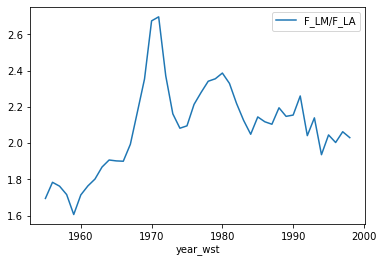

In [18]:
fig, ax = plt.subplots()
df_GDP_emp_picked.plot(x = 'year_wst', y = 'F_LM/F_LA', ax = ax)
plt.legend()

In [19]:
df_emp_picked 

NameError: name 'df_emp_picked' is not defined